<a href="https://colab.research.google.com/github/kjbhardwaj99/Project_Default_of_Credit_Card/blob/main/Project_Default_of_Credit_Card_Clients_EDA_and_Prediction_Classification(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS PROJECT IS ONGOING**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

import warnings  # Importing warnings to handle warnings
warnings.filterwarnings('ignore')  # Ignoring warnings for cleaner output


In [69]:
df=pd.read_csv('/content/drive/MyDrive/data sci/project/Copy of default of credit card clients - Data.csv')

# **EDA**

In [37]:
len(df[df.duplicated()])

0

In [70]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [39]:
df.drop(columns=['ID'],inplace=True)

In [40]:
print(len(df[df.duplicated()]))
df = df.drop_duplicates()

35


In [41]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [42]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [43]:
df.isna().sum().to_frame()

0
LIMIT_BAL                   0
SEX                         0
EDUCATION                   0
MARRIAGE                    0
AGE                         0
PAY_0                       0
PAY_2                       0
PAY_3                       0
PAY_4                       0
PAY_5                       0
PAY_6                       0
BILL_AMT1                   0
BILL_AMT2                   0
BILL_AMT3                   0
BILL_AMT4                   0
BILL_AMT5                   0
BILL_AMT6                   0
PAY_AMT1                    0
PAY_AMT2                    0
PAY_AMT3                    0
PAY_AMT4                    0
PAY_AMT5                    0
PAY_AMT6                    0
default payment next month  0

In [44]:
pd.concat([df.dtypes.to_frame(name='Dtype'), df.isna().sum().to_frame(name='Nulls')], axis=1)

Dtype  Nulls
LIMIT_BAL                   int64      0
SEX                         int64      0
EDUCATION                   int64      0
MARRIAGE                    int64      0
AGE                         int64      0
PAY_0                       int64      0
PAY_2                       int64      0
PAY_3                       int64      0
PAY_4                       int64      0
PAY_5                       int64      0
PAY_6                       int64      0
BILL_AMT1                   int64      0
BILL_AMT2                   int64      0
BILL_AMT3                   int64      0
BILL_AMT4                   int64      0
BILL_AMT5                   int64      0
BILL_AMT6                   int64      0
PAY_AMT1                    int64      0
PAY_AMT2                    int64      0
PAY_AMT3                    int64      0
PAY_AMT4                    int64      0
PAY_AMT5                    int64      0
PAY_AMT6                    int64      0
default payment next month  int64      0

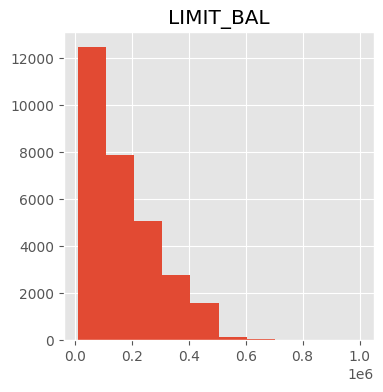

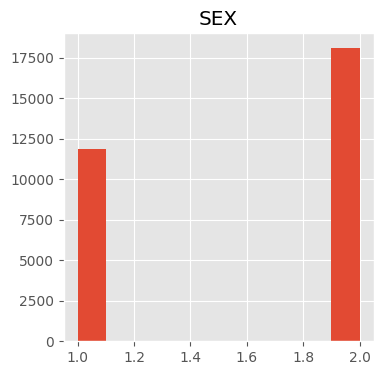

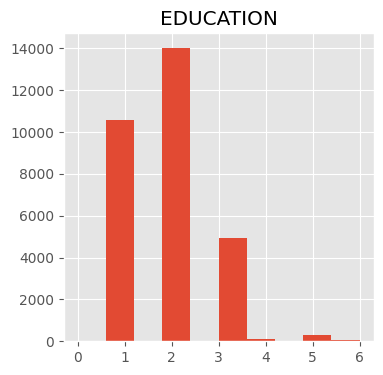

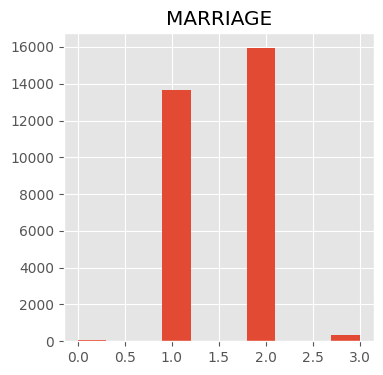

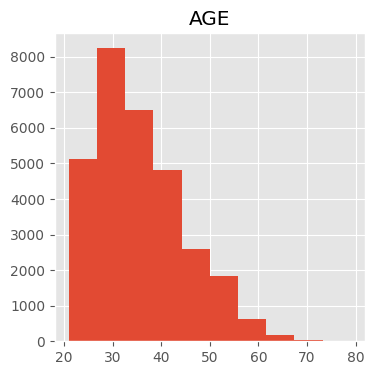

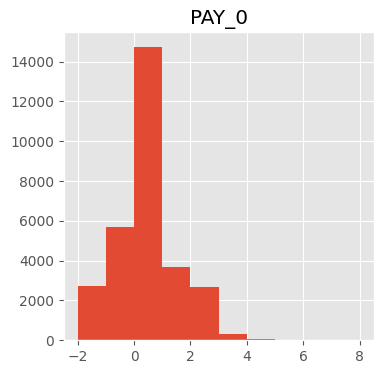

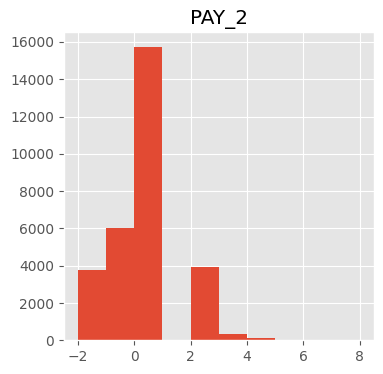

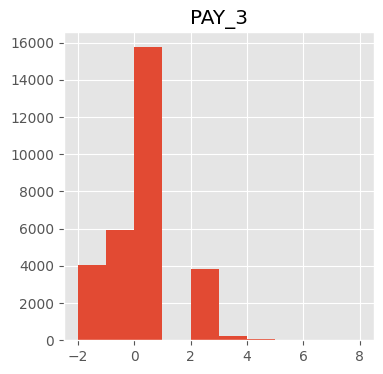

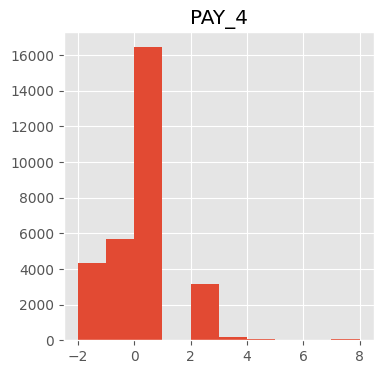

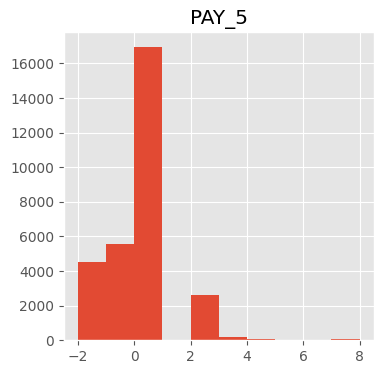

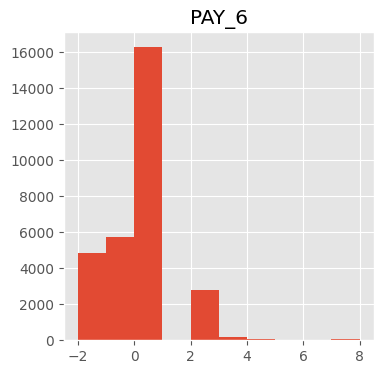

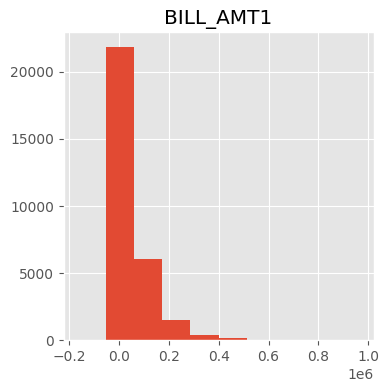

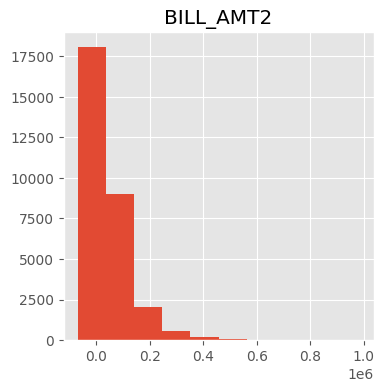

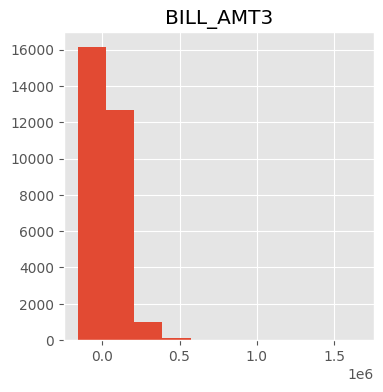

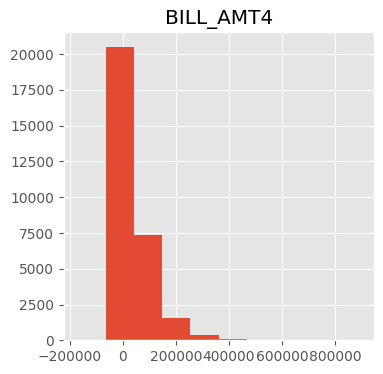

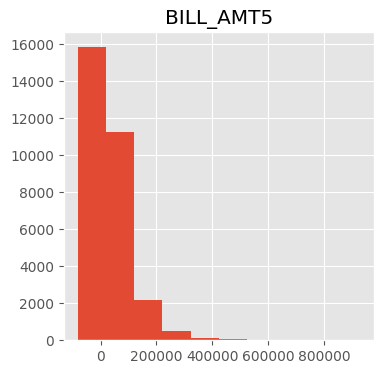

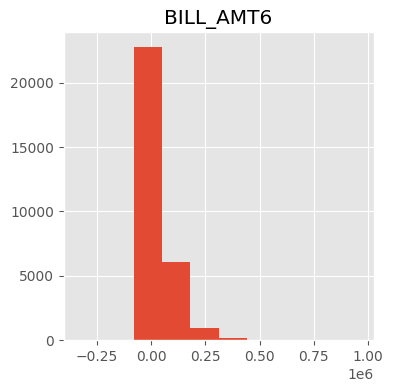

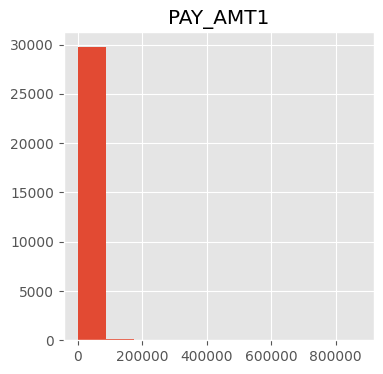

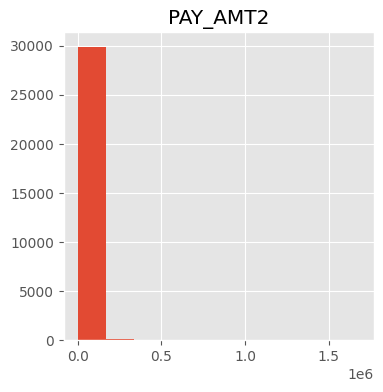

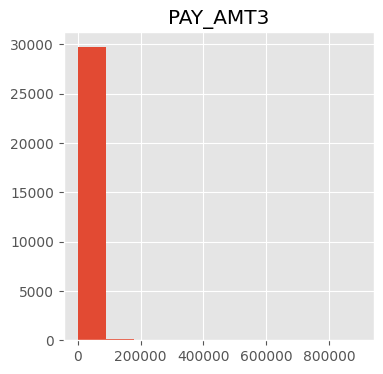

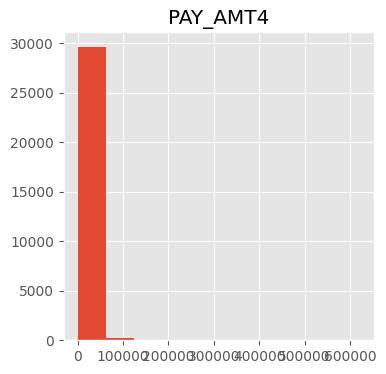

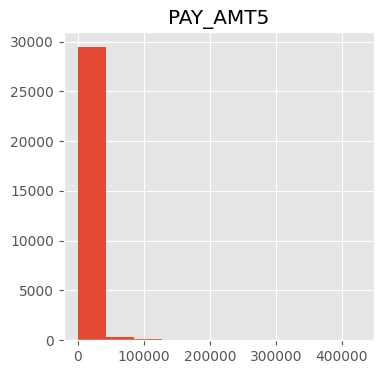

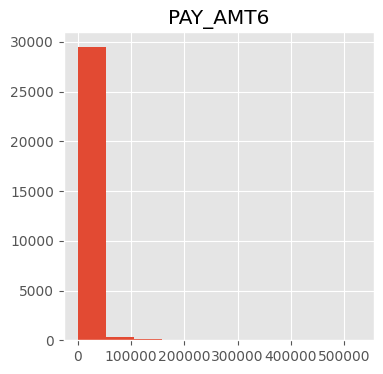

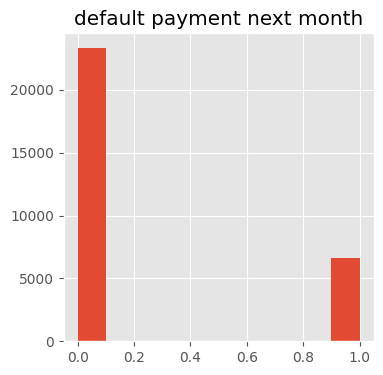

In [45]:
for i in df.columns.to_list():
  fig=plt.figure(figsize=(4,4))
  ax=plt.gca()
  ax.hist(df[i])
  ax.set_title(i)

In [46]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<Axes: xlabel='SEX'>

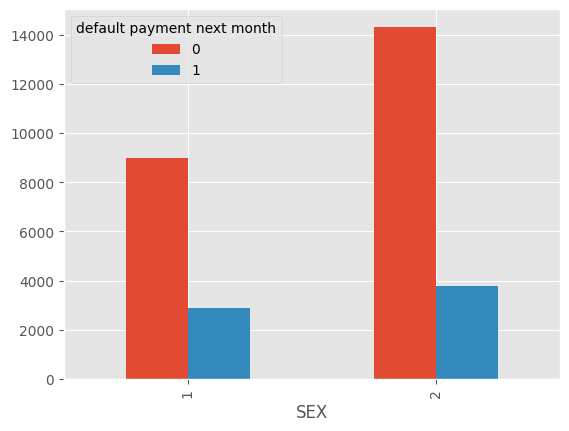

In [60]:
df.groupby(['SEX','default payment next month'])['SEX'].count().unstack().plot(kind='bar')

<Axes: xlabel='EDUCATION'>

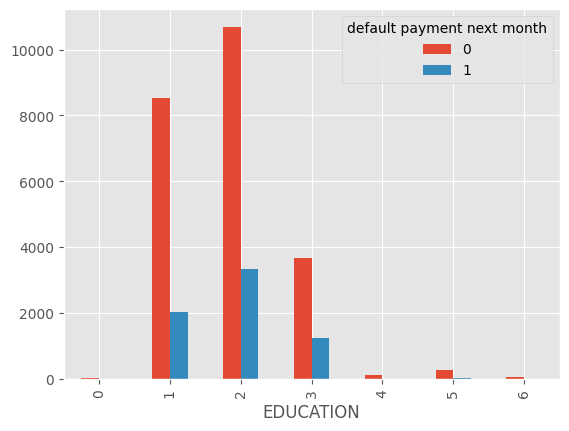

In [65]:
df.groupby(['EDUCATION','default payment next month'])['SEX'].count().unstack().plot(kind='bar')

<Axes: xlabel='MARRIAGE'>

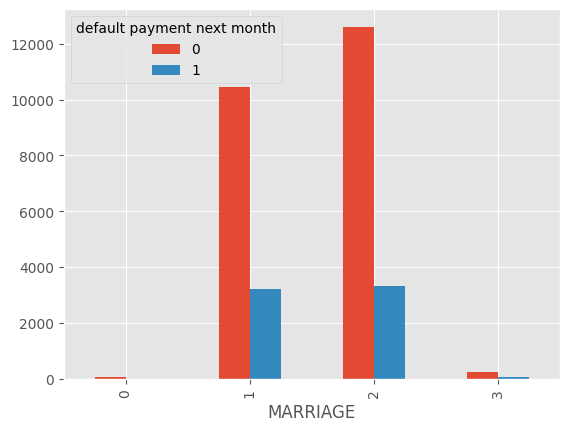

In [66]:
df.groupby(['MARRIAGE','default payment next month'])['SEX'].count().unstack().plot(kind='bar')

In [75]:
df['default payment next month'].unique()

array([1, 0])

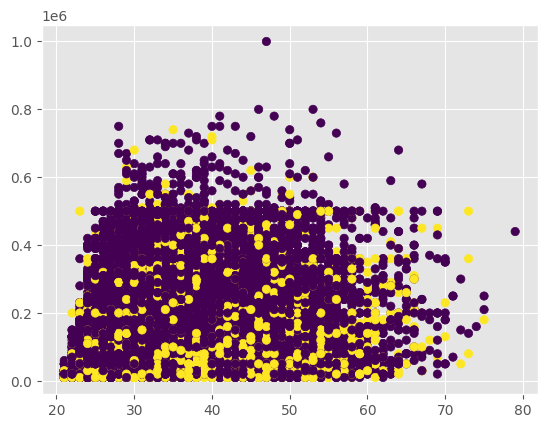

In [83]:
plt.scatter(df['AGE'],df['LIMIT_BAL'],c=df['default payment next month'])
plt.show()

In [47]:
dependent_variable='default payment next month'

features=[i for i in df.columns.to_list() if i not in ['default payment next month']]
features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [48]:
X=df[features]
y=df[dependent_variable]

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(23972, 23)
(5993, 23)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

# **Classification**

In [15]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3da1c7d8748cf270e059abe3d24397fd6fc5f8e67c79a8530e6e005d61cee71c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [16]:
# LIME SECTION
import sklearn
import sklearn.datasets
import sklearn.ensemble

import lime
import lime.lime_tabular
from __future__ import print_function


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)

## **Logistic Regression**

In [20]:
Logistic_model=LogisticRegression(max_iter=1000,fit_intercept=True).fit(X_train_std,y_train)

test_preds = Logistic_model.predict(X_test_std)
train_preds = Logistic_model.predict(X_train_std)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.809652928416486
The accuracy on test data is  0.811780410478892


[[4673    0]
 [1320    0]]


[Text(0, 0.5, 'Default'), Text(0, 1.5, 'Not Default')]

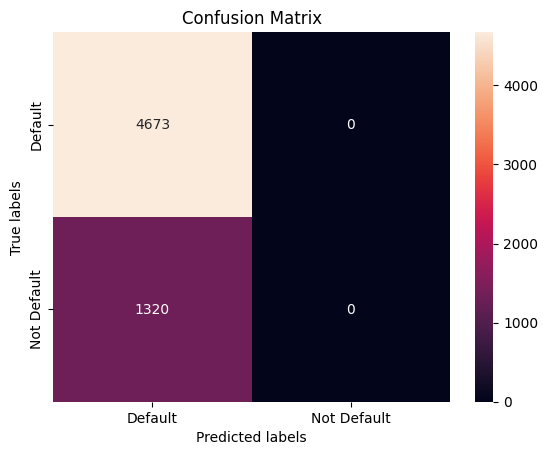

In [23]:
# Get the confusion matrix for both train and test

labels = ['Default', 'Not Default']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **LogisticRegressionCV**

In [27]:
from sklearn.linear_model import LogisticRegressionCV

cv_logistic_model=LogisticRegressionCV(cv=5).fit(X_train_std,y_train)

test_preds = cv_logistic_model.predict(X_test_std)
train_preds = cv_logistic_model.predict(X_train_std)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8096946437510428
The accuracy on test data is  0.811780410478892


[[4557  116]
 [1012  308]]


[Text(0, 0.5, 'Default'), Text(0, 1.5, 'Not Default')]

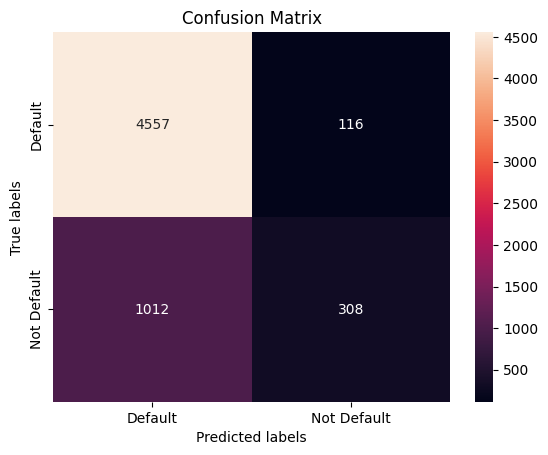

In [28]:
# Get the confusion matrix for both train and test

labels = ['Default', 'Not Default']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc


In [49]:
param_grid = {
    'criterion': ['log_loss', 'entropy', 'gini'],
    'max_features': [2, 3, 7, 8, 10],
    'max_leaf_nodes':[2,3,4,5,8,10],

    'max_depth':[2,4,6,8,9,10]

}

In [50]:
tree_model_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=2
)

In [51]:
tree_model_cv.fit(X_train,y_train).best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'criterion': 'gini', 'max_depth': 6, 'max_features': 10, 'max_leaf_nodes': 10}

In [53]:

tree_model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10,max_depth= 6,max_features= 10, random_state=0).fit(X_train, y_train)


test_preds = tree_model.predict(X_test)
train_preds = tree_model.predict(X_train)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8190805940263641
The accuracy on test data is  0.8184548640080094


[[4483  190]
 [ 880  440]]


[Text(0, 0.5, 'Default'), Text(0, 1.5, 'Not Default')]

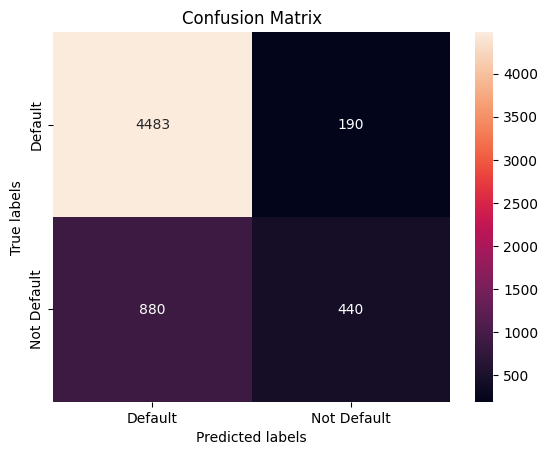

In [28]:
# Get the confusion matrix for both train and test

labels = ['Default', 'Not Default']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

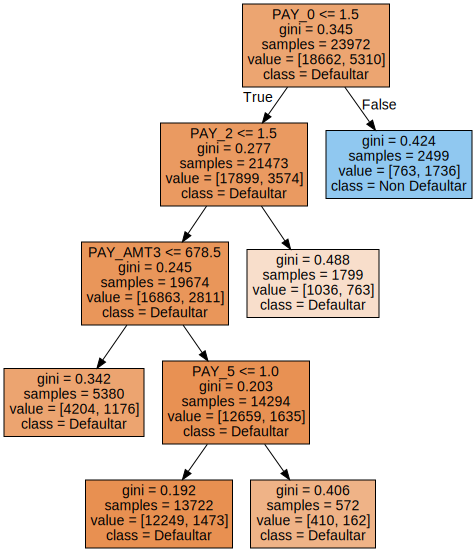

In [29]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(tree_model, out_file=None
   , feature_names=X_train.columns, class_names=['Defaultar', 'Non Defaultar']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [30]:
i = 42
exp = explainer.explain_instance(X_test.iloc[i], tree_model.predict_proba, num_features=8)

exp.show_in_notebook(show_all=False)

## **Random Forest**

In [31]:
df.shape

(29965, 24)

In [32]:
param_grid = {
    'criterion': ['log_loss', 'entropy', 'gini'],
    'max_features': [2, 3, 7, 8, 10],
    'max_samples': [10, 25, 75, 100, 500],
    'n_estimators': [10, 50, 100, 500]
}

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
model_f_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=2
)

In [37]:
model_f_cv.fit(X_train, y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['log_loss', 'entropy', 'gini'],
                         'max_features': [2, 3, 7, 8, 10],
                         'max_samples': [10, 25, 75, 100, 500],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy', verbose=2)

In [38]:
model_f_cv.best_params_

{'criterion': 'gini',
 'max_features': 8,
 'max_samples': 500,
 'n_estimators': 100}

In [39]:
from sklearn.ensemble import RandomForestClassifier

randomf_model=RandomForestClassifier(criterion='gini',max_features=8,max_samples=500,n_estimators=100).fit(X_train, y_train)

test_preds = randomf_model.predict(X_test)
train_preds = randomf_model.predict(X_train)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.824211580176873
The accuracy on test data is  0.8179542799933256


In [35]:

i = 422
exp = explainer.explain_instance(X_test.iloc[i], randomf_model.predict_proba, num_features=8)

exp.show_in_notebook(show_all=False)

## **XGBoost**

In [33]:
from xgboost import XGBClassifier

xg_model=XGBClassifier().fit(X_train, y_train)

test_preds = xg_model.predict(X_test)
train_preds = xg_model.predict(X_train)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8868680126814618
The accuracy on test data is  0.8127815785082596


In [34]:
i = 7
exp = explainer.explain_instance(X_test.iloc[i], xg_model.predict_proba, num_features=8)

exp.show_in_notebook(show_all=False)

In [ ]:
pip install eli5

In [74]:
import eli5 as eli
eli.explain_weights(xg_model)

Explanation(estimator='XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n              num_parallel_tree=None, random_state=None, ...)', description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='PAY_0', weight=0.41158122, std=None, value=None), FeatureWeight(feature='PAY_2', weight=0.10310177, std=None, value=None), FeatureWeight(feature='PAY_3', weight=0.042321183, std=None, value=None), FeatureWeight(feature='PAY_4', weight=0.041064057, std=None, value=None), FeatureWeight(feature='PAY_6', weight=0.03340475, std=None, value=None), FeatureWeight(feature='PAY_5', weight=0.028861338, std=None, value=None), FeatureWeight(feature='PAY_AMT3', weight=0.02472628, std=None, value=None), FeatureWeight(feature='BILL_AMT1', weight=0.023623763, std=None, value=None), FeatureWeight(feature='PAY_AMT2', weight=0.023125233, std=None, value=None), FeatureWeight(feature='LIMIT_BAL', weight=0.022306643, std=None, value=None), FeatureWeight(feature='PAY_AMT4', weight=0.021255296, std=None, value=None), FeatureWeight(feature='PAY_AMT1', weight=0.020339817, std=None, value=None), FeatureWeight(feature='PAY_AMT6', weight=0.019589081, std=None, value=None), FeatureWeight(feature='BILL_AMT3', weight=0.019381717, std=None, value=None), FeatureWeight(feature='BILL_AMT4', weight=0.019323518, std=None, value=None), FeatureWeight(feature='BILL_AMT2', weight=0.01919018, std=None, value=None), FeatureWeight(feature='EDUCATION', weight=0.019186882, std=None, value=None), FeatureWeight(feature='PAY_AMT5', weight=0.019058794, std=None, value=None), FeatureWeight(feature='BILL_AMT6', weight=0.018590806, std=None, value=None), FeatureWeight(feature='SEX', weight=0.01855517, std=None, value=None)], remaining=3), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [75]:
eli.explain_prediction(xg_model , X_train.iloc[8],show)

Explanation(estimator='XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n              num_parallel_tree=None, random_state=None, ...)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='PAY_0', weight=0.4755961406346256, std=None, value=0.0), FeatureWeight(feature='<BIAS>', weight=0.2647121077702568, std=None, value=1.0), FeatureWeight(feature='BILL_AMT3', weight=0.1701008554480224, std=None, value=0.0), FeatureWeight(feature='BILL_AMT4', weight=0.16292046455841228, std=None, value=787.0), FeatureWeight(feature='BILL_AMT1', weight=0.15431266420339432, std=None, value=42856.0), FeatureWeight(feature='PAY_AMT3', weight=0.08491665335681617, std=None, value=787.0), FeatureWeight(feature='PAY_2', weight=0.05228558609022594, std=None, value=0.0), FeatureWeight(feature='PAY_4', weight=0.03530723491108014, std=None, value=-1.0), FeatureWeight(feature='BILL_AMT6', weight=0.02169330945005694, std=None, value=0.0), FeatureWeight(feature='PAY_5', weight=0.013411823825657525, std=None, value=-1.0), FeatureWeight(feature='PAY_3', weight=0.011289090067032272, std=None, value=0.0)], neg=[FeatureWeight(feature='PAY_AMT2', weight=-0.24771969797049162, std=None, value=0.0), FeatureWeight(feature='PAY_AMT1', weight=-0.21501726653749104, std=None, value=3114.0), FeatureWeight(feature='BILL_AMT2', weight=-0.1349463775700161, std=None, value=44925.0), FeatureWeight(feature='PAY_AMT6', weight=-0.12965939405334634, std=None, value=0.0), FeatureWeight(feature='AGE', weight=-0.09288508015373957, std=None, value=40.0), FeatureWeight(feature='SEX', weight=-0.08740952535235466, std=None, value=1.0), FeatureWeight(feature='LIMIT_BAL', weight=-0.08252685955370072, std=None, value=90000.0), FeatureWeight(feature='PAY_AMT4', weight=-0.07102898406011307, std=None, value=1457.0), FeatureWeight(feature='PAY_6', weight=-0.06123608538190025, std=None, value=-1.0), FeatureWeight(feature='EDUCATION', weight=-0.050265408302578245, std=None, value=2.0), FeatureWeight(feature='MARRIAGE', weight=-0.038703571867667846, std=None, value=1.0), FeatureWeight(feature='PAY_AMT5', weight=-0.031757647991539684, std=None, value=0.0), FeatureW

## **KNN**

In [31]:
X_train.shape

(23972, 23)

In [32]:
np.sqrt(23972)

154.82893786369524

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=34).fit(X_train_std,y_train)


test_preds = knn_model.predict(X_test_std)
train_preds = knn_model.predict(X_train_std)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8177874186550976
The accuracy on test data is  0.8121141331553479


In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,100)}
knn_model_cv = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',

    cv=5,

)

knn_model_cv.fit(X_train_std, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [ ]:
knn_model_cv.best_params_

## **Naive Bayes Classifier**

In [29]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB().fit(X_train_std,y_train)

test_preds = naive_model.predict(X_test_std)
train_preds = naive_model.predict(X_train_std)

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7391957283497413
The accuracy on test data is  0.7348573335558152


# **Ensembels**

## **Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
estimators=[('lr',LogisticRegression()),('dc',DecisionTreeClassifier()),('rf',RandomForestClassifier())]

In [ ]:
vc=VotingClassifier(estimators=estimators,voting='soft')

In [ ]:
vc

In [ ]:
voting_model=vc.fit(X_train,y_train)

In [ ]:
test_preds = voting_model.predict(X_test)
train_preds = voting_model.predict(X_train)

# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

## **Bagging**

In [ ]:

from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


# Define the base model
base_model = DecisionTreeClassifier()

# Create a Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Fit the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)

labels = ['Default', 'Not Default']

ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


# Define the base model
base_model = LogisticRegression()

# Create a Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Fit the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)


labels = ['Default', 'Not Default']

ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
df.head()

# **Explainability**